# Advanced example for running an LCA in AeroMAPS 

> *This notebook requires a valid ecoinvent license. You also need to install the corresponding LCA packages with `pip install --upgrade aeromaps[lca]`*

For advanced users willing to customize the LCA model, this notebook shows how to set up and run an AeroMAPS simulation with a custom LCA model defined in a configuration YAML file. 

The custom LCA model used in this example is defined in the file `data/lca_data/custom_model/custom_lca_model.yaml`. It includes:
- The name of the LCA project (this will install or reuse the corresponding [Brightway](https://docs.brightway.dev/en/latest/) project).
- The LCA database to use (ecoinvent 3.10 cutoff in this example).
- The SSP-RCPs scenario to use for projecting the ecoinvent background data with [premise](https://premise.readthedocs.io/en/latest/index.html) (SSP2 with no climate policy in this example - you may change depending on the latest developments of premise).
- The LCA model definition (also referred to as a parametric inventory), which defines the various datasets to be imported from ecoinvent and how they are connected to the AeroMAPS processes/parameters. You may also tag the datasets with a "phase" attribute to split the LCA results by life cycle phase (as done in this example).
- The impact assessment methods to use (either from LCIA methods defined in Brightway/ecoinvent or custom methods with characterization factors provided in CSV files).

For more information on how to define a custom LCA model through a configuration file, please refer to the [LCA-Modeller](https://github.com/AeroMAPS/lca-modeller) library, a side project of AeroMAPS dedicated to the definition of parametric LCA models.


> ***Note**: The first time you run this notebook, it may take a dozen minutes depending on the complexity of the LCA model, as it will install the ecoinvent and premise databases (unless previously installed) and parametrize the LCA model declared in the configuration file (each time the kernel is restarted). Subsequent runs will be much faster.*



## Import librairies and configuration

In [1]:
# --- Import libraries ---
%matplotlib widget
import sys
sys.path.insert(0, './utils/')
import pandas as pd
import brightway2 as bw
import lca_algebraic as agb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import math
import collections
import time
from plots import plot_stacked_evolution_subplots
plt.style.use("bmh")
from aeromaps import create_process

## Set models and create process

This example notebook covers the ICAO's LTAG integrated scenarios. The corresponding configuration files are provided in the `./data/config_files` directory.

For using the default LCA model, you must declare it in the configuration file with the following lines:
```yaml
life_cycle_assessment:
    lca_model_data_file: "../lca_data/custom_model/custom_lca_model.yaml"
    split_by: 'phase'
```

There are two inputs to provide here: 
- `lca_model_data_file`: the path to a `.yaml` file containing the LCA model definition. The YAML format is the main difference with the default LCA model provided as a JSON. You may check both files to see how they differ.
- `split_by` (optional): enables you to split the impacts to get the individual contributions of the air transport components (aircraft production, fuel combustion, etc.). This directly relates to the `custom_attributes` fields declared in the YAML file definition.

In [2]:
# --- Set AeroMAPS models and create process for IS scenario ---
# Note: first call to LCA module takes a dozen minutes depending on CPU, as it will install ecoinvent/premise databases (unless previsouly installed)
# and parametrize the LCA model declared in LCA configuration file (each time the kernel is restarted).
process = create_process(
    configuration_file="data/config_files/config_is2medium_custom_lca.yaml",  # <-- select LTAG IS scenario (from 0 to 3)
)

⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.
⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.
⚠️ Warning: reference pathway for CAC (fossil_kerosene) is not defined as bottom-up, using top-down values for CAC computation.
Initial setup of EcoInvent already done, skipping. To reset the project use option `reset_project=True` in configuration file.
Creating custom LCIA method  ('Custom methods', 'climate change (with non-CO2)', 'global warming potential (GWP100)')


Writing activities to SQLite3 database:
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/04/2025 17:15:57
  Finished: 12/04/2025 17:15:57
  Total time elapsed: 00:00:00
  CPU %: 2.50
  Memory %: 2.49
Added 1 new biosphere flows
1 methods
130 cfs
0 unlinked cfs
Wrote 1 LCIA methods with 130 characterization factors
Wrote matching file to:
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/notebooks/tutorials/07_life_cycle_assessment/data/lca_data/custom_model/lcia_nonCO2_global_warming_updated.xlsx
Creating custom LCIA method  ('Custom methods', 'total: ecosystem quality (with non-CO2)', 'ecosystem quality')
1 methods
1990 cfs
0 unlinked cfs
Wrote 1 LCIA methods with 1990 characterization factors
Wrote matching file to:
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/notebooks/tutorials/07_life_cycle_assessment/data/lca_data/custom_model/lcia_nonCO2_ecosystem_quality_updated.xlsx
Creating custom LCIA method  ('Custom methods', 'total: human health (with non-CO2)', 'human health')
1 methods
1618 cfs
0 unlinked

## Run AeroMAPS simulation and assessment

In [3]:
# --- Run assessment ---
start_time = time.time()
process.compute()
process.write_json()
print("--- %s seconds ---" % (time.time() - start_time))

Running MDA
⚠️ Warning: excess generic_biofuel production in years: [2021]. Scaling down.


/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: generic_electricity_availability_global Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: generic_biomass_availability_global Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant f

--- 5.240145921707153 seconds ---


/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: electrolysis_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(


## Visualize LCA results

In [4]:
# --- Results ---
process_data_vector_outputs = process.data["vector_outputs"]
process_data_float_inputs = process.data["float_inputs"]
process_data_climate = process.data["climate_outputs"]
lca_outputs = process.data["lca_outputs"]
lca_outputs

<xarray.DataArray 'lca' (systems: 1, impacts: 24, axis: 15, year: 71)> Size: 204kB
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [3.38845324e+07, 3.36472950e+07, 3.34100576e+07, ...,
          2.29493189e+07, 2.28926453e+07, 2.28359716e+07],
         [3.30538240e+08, 3.22260968e+08, 3.24204148e+08, ...,
          2.31281631e+08, 2.31489630e+08, 2.31565602e+08],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.16768947e+09, 1.23794605e+09, 1.31040839e+09]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
         [2.46837961e+01, 2.45097449e+01, 2.43356938e+01, ...,
          1.59304300e+01, 1.58696333e+01, 1.58088365e+01],
         [3.26994188e+02, 3.19066468e+02, 3.21254338e+02, ...,
          2.32728387e+02, 2.32850583e+02, 2.32839750e+02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          2.34176188e+02, 2.45149407e+02, 2.56179744e+02]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [3.70124786e+05, 3.61936185e+05, 3.65211625e+05, ...,
          2.95305775e+05, 2.95775393e+05, 2.96076854e+05],
         ...,
         [8.17641851e+03, 8.11874595e+03, 8.06107339e+03, ...,
          5.27597980e+03, 5.25583587e+03, 5.23569193e+03],
         [1.08273768e+05, 1.05648593e+05, 1.06372872e+05, ...,
          7.70543780e+04, 7.70947804e+04, 7.70911378e+04],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          7.76019931e+04, 8.12385561e+04, 8.48940754e+04]]]])
Coordinates:
  * systems  (systems) object 8B ('Foreground DB', 'model')
  * impacts  (impacts) object 192B ('ReCiPe 2016 v1.03, midpoint (H)', 'acidi...
  * axis     (axis) object 120B 'CO2_biofuel' ... 'e_fuel_production'
  * year     (year) float64 568B 2e+03 2.001e+03 ... 2.069e+03 2.07e+03

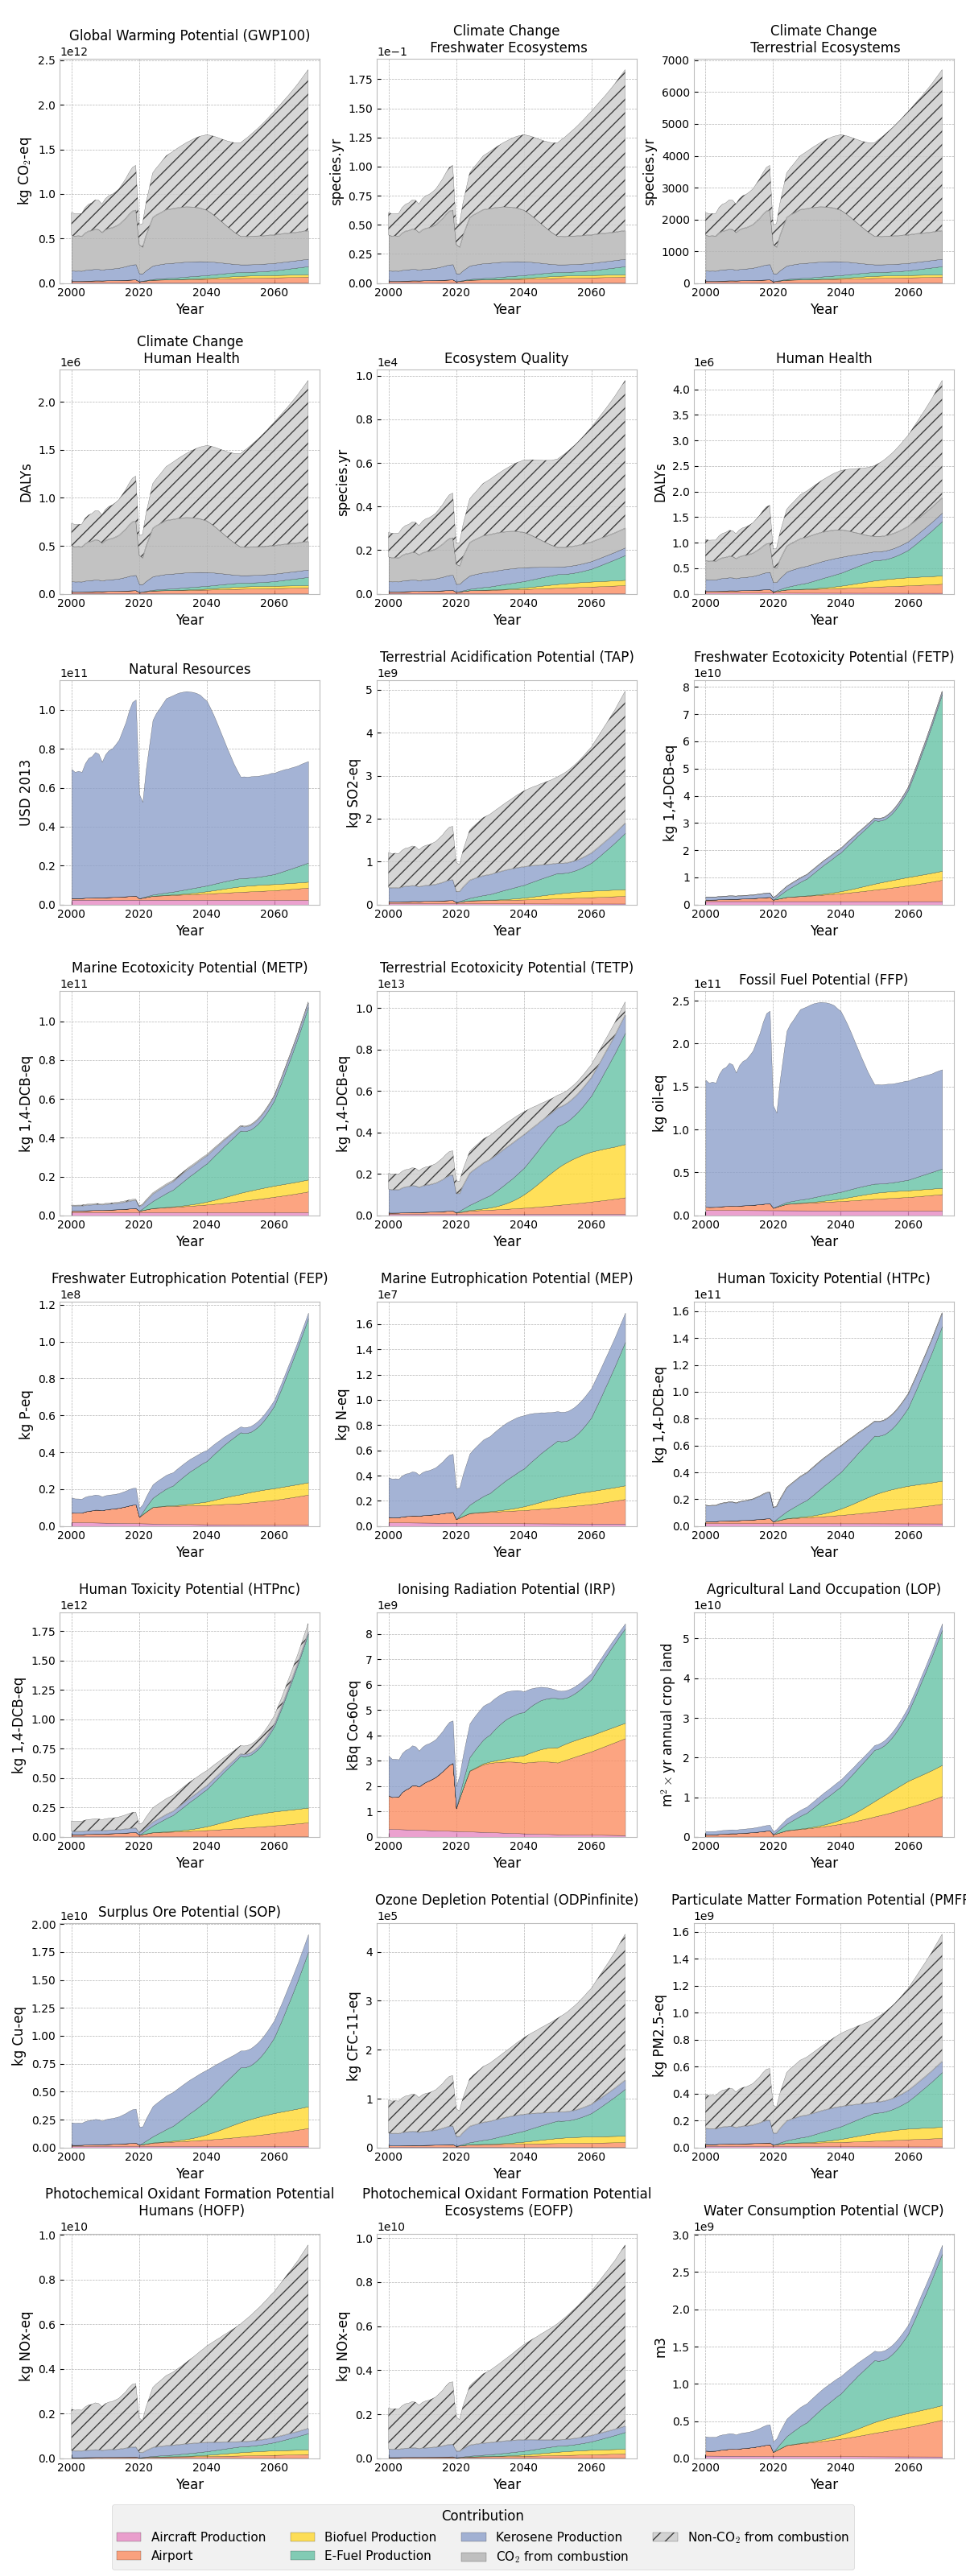

In [5]:
# --- Plots ---
plt.close()
plot_stacked_evolution_subplots(lca_outputs)

----------

# Exporting your custom LCA model

If you wish to export your custom LCA model for reuse in other AeroMAPS projects or internal sharing, you may have a look at the [export LCA model notebook](./utils/export_lca_model.ipynb). You will learn how to generate a JSON file similar to the one used in the default LCA module. This JSON file can then be used directly for faster LCA calculations without the need to recompile the model each time. 